In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
from skimage import transform, feature

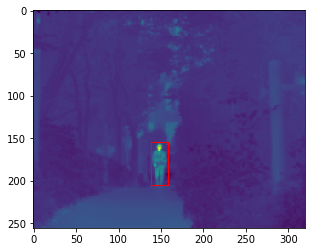

In [2]:
# Load image
im_t = np.array(Image.open('../data/TIR/TIR003.png'))

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im_t)

# Create a Rectangle patch
rect = patches.Rectangle((138,155),20,50,linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

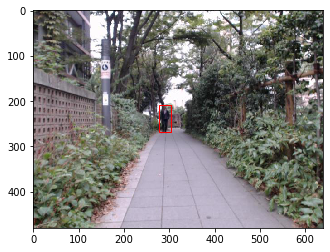

In [3]:
# Load image
im_r = np.array(Image.open('./data/RGB/RGB003.png'))

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im_r)

# Create a Rectangle patch
rect = patches.Rectangle((278,208),25,60,linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

In [4]:
target_t = Image.open('../data/TIR/TIR003.png')
cropped_t = target_t.crop((138, 155, 158, 205))  # (left, upper, right, lower)
target_t = np.array(cropped_t)
target_t = transform.resize(target_t,(128,64))
print(target_t.shape)

target_r = Image.open('../data/RGB/RGB003.png')
cropped_r = target_r.crop((278, 208, 303, 268))  # (left, upper, right, lower)
target_r = np.array(cropped_r)
target_r = transform.resize(target_r,(128,64))
print(target_r.shape)

(128, 64)
(128, 64, 3)


In [5]:
orient = 9
pix_per_cell = 8
cell_per_block = 2

hog_day_target_r_features, hog_day_target_r = feature.hog(target_r, orientations=orient, multichannel=True,
                                                    pixels_per_cell=(pix_per_cell, pix_per_cell),
                                                    cells_per_block=(cell_per_block, cell_per_block),
                                                    visualize=True, feature_vector=False)
hog_day_target_t_features, hog_day_target_t = feature.hog(target_t, orientations=orient, multichannel=False,
                                                    pixels_per_cell=(pix_per_cell, pix_per_cell),
                                                    cells_per_block=(cell_per_block, cell_per_block),
                                                    visualize=True, feature_vector=False)

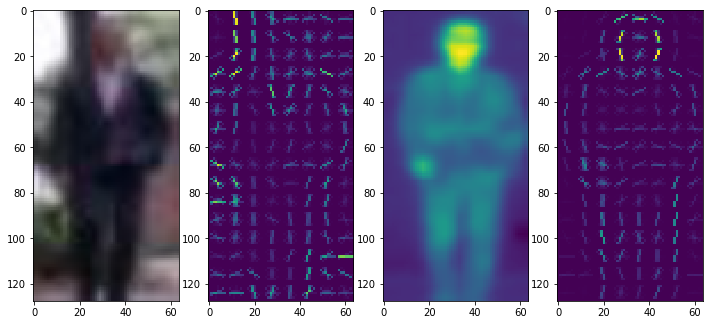

In [6]:
fig_day, ax_day = plt.subplots(nrows=1, ncols=4, figsize = (12, 6))
ax_day[0].imshow(target_r)
ax_day[1].imshow(hog_day_target_r)
ax_day[2].imshow(target_t)
ax_day[3].imshow(hog_day_target_t)
plt.show()

In [7]:
print(hog_day_target_t_features.shape)

(15, 7, 2, 2, 9)


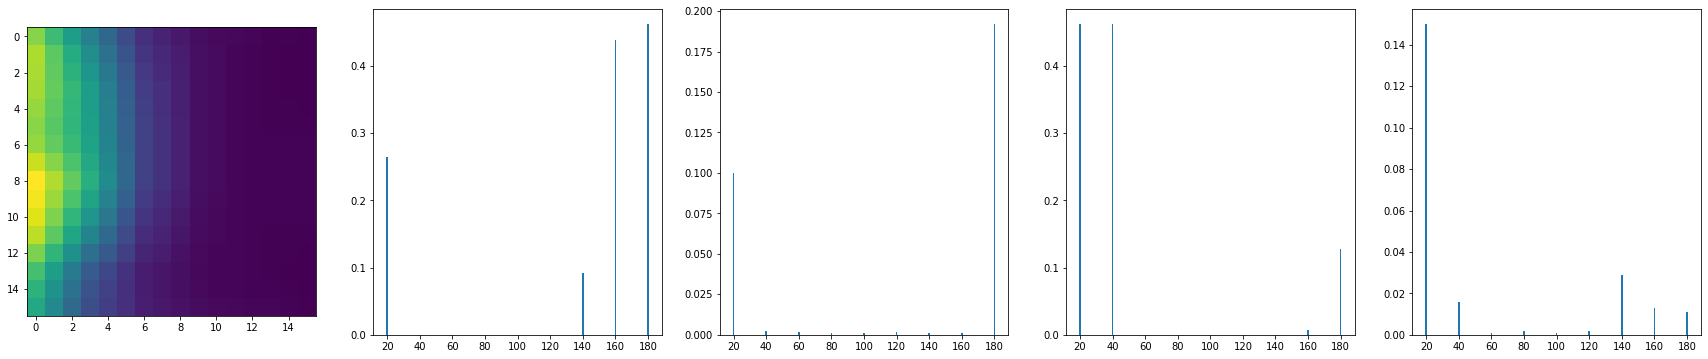

In [8]:
exm_t = Image.fromarray(target_t)
exm_t = exm_t.crop((40, 8, 56, 24))  # (left, upper, right, lower)
exm_t = np.array(exm_t)

angles = np.array([20,40,60,80,100,120,140,160,180])
fig_t, ax_t = plt.subplots(nrows=1, ncols=5, figsize = (30, 6))
ax_t[0].imshow(exm_t)
ax_t[1].bar(angles,hog_day_target_t_features[1][5][0][0], 1)
ax_t[2].bar(angles,hog_day_target_t_features[1][5][0][1], 1)
ax_t[3].bar(angles,hog_day_target_t_features[1][5][1][0], 1)
ax_t[4].bar(angles,hog_day_target_t_features[1][5][1][1], 1)
plt.show()

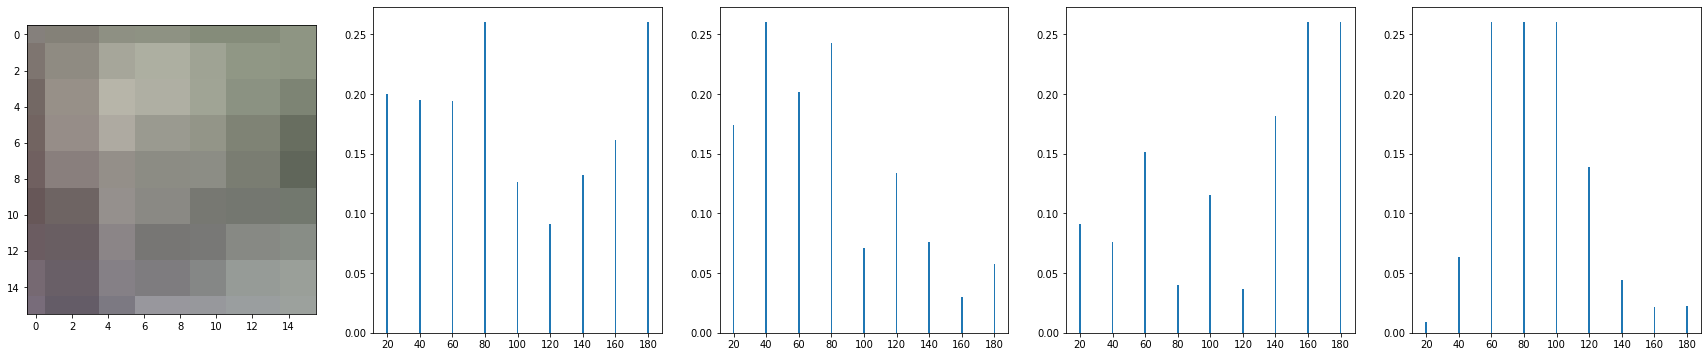

In [9]:
exm_r = Image.open('../data/RGB/RGB003.png')
exm_r = exm_r.crop((278, 208, 303, 268))  # (left, upper, right, lower)
exm_r = exm_r.resize((64,128))
exm_r = exm_r.crop((40, 8, 56, 24))  # (left, upper, right, lower)
exm_r = np.array(exm_r)

angles = np.array([20,40,60,80,100,120,140,160,180])
fig_r, ax_r = plt.subplots(nrows=1, ncols=5, figsize = (30, 6))
ax_r[0].imshow(exm_r)
ax_r[1].bar(angles,hog_day_target_r_features[1][5][0][0], 1)
ax_r[2].bar(angles,hog_day_target_r_features[1][5][0][1], 1)
ax_r[3].bar(angles,hog_day_target_r_features[1][5][1][0], 1)
ax_r[4].bar(angles,hog_day_target_r_features[1][5][1][1], 1)
plt.show()

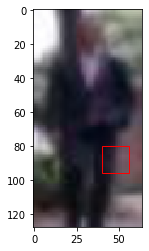

In [12]:
# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(target_r)

# Create a Rectangle patch
rect = patches.Rectangle((40,80),16,16,linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()